In [4]:

import seaborn as sns
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [9]:
data.head(1)
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [14]:
import numpy as np
for col in data.columns:
    if data[col].skew()>.55:
        data[col]=np.log1p(data[col])

In [15]:
data.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [17]:
from scipy.stats import zscore
zs=abs(zscore(data))
data2=data[(zs<3).all(axis=1)]

In [18]:
data.shape, data2.shape

((30, 17), (29, 17))

<AxesSubplot:>

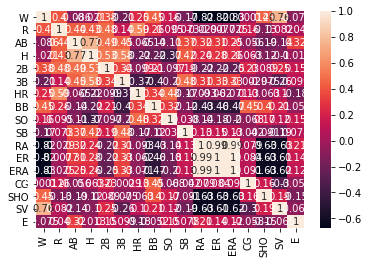

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=data2.corr()
sns.heatmap(corrmat, annot=True, robust=True,  )

In [22]:
data_x=data.drop(columns=["W"])
y=data.W

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_x_=sc.fit_transform(data_x)
X=pd.DataFrame(data_x_, columns=data_x.columns)

In [33]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r=0
for r in range(42, 200):
    X_train, X_test, y_train, y_test=split(X,y,test_size=.2, random_state=r)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    score=r2_score(y_test,y_pred)
    if score>max_r:
        max_r=score
        final_r=r
print("Max_r2_score:", max_r, "r:", final_r)

Max_r2_score: 0.9174374051002097 r: 119


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,y,cv=10, scoring="r2")

array([  0.91781602,   0.7374107 ,  -4.2136481 ,   0.44807496,
        -1.59626272, -65.66512281,   0.80527011,   0.53579176,
         0.86436846,  -1.61788959])

In [36]:
X_train, X_test, y_train, y_test=split(X,y,test_size=.2, random_state=119)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
score=r2_score(y_test,y_pred)

In [37]:
np.sqrt(mean_absolute_error(y_test, y_pred))

1.598248493170742

In [ ]:
from sklearn.externals import joblib 
joblib.dump(lr, "concrete.pkl")